In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import yfinance as yf
from sklearn.metrics import r2_score

### Step 1: Fetch stock data

In [2]:
stock_data = yf.download("TSLA", start="2023-01-01", end="2023-12-31")
stock_data = stock_data[['Close']]  # Use closing prices
stock_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


### Step 2: Create better features

In [3]:
# Previous Close
stock_data['Previous_Close'] = stock_data['Close'].shift(1)

# Exponential Moving Average (10-day)
stock_data['EMA_10'] = stock_data['Close'].ewm(span=10, adjust=False).mean()

# Relative Strength Index (RSI_14)
delta = stock_data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
stock_data['RSI_14'] = 100 - (100 / (1 + rs))

In [4]:

# Drop rows with NaN values caused by feature calculations
stock_data = stock_data.dropna()


### Step 3: Prepare features and target variable
#### Features: Previous Close, EMA_10, RSI_14

In [5]:

X = stock_data[['Previous_Close', 'EMA_10', 'RSI_14']].values
# Target: Current day Close
y = stock_data['Close'].values

### Step 4: Split data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Train a multiple linear regression model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 6: Predict stock prices

In [8]:
y_pred = model.predict(X_test)

### Step 7: Evaluate the model

In [9]:
print("Model Coefficients:")
for idx, feature in enumerate(['Previous_Close', 'EMA_10', 'RSI_14']):
    print(f"{feature}: {model.coef_[0,idx]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"R-squared score: {r2:.4f}")

Model Coefficients:
Previous_Close: 0.2850
EMA_10: 0.6947
RSI_14: 0.3541
Intercept: -12.9712

Model Performance:
R-squared score: 0.9818


### Step 8: Visualize actual vs predicted prices

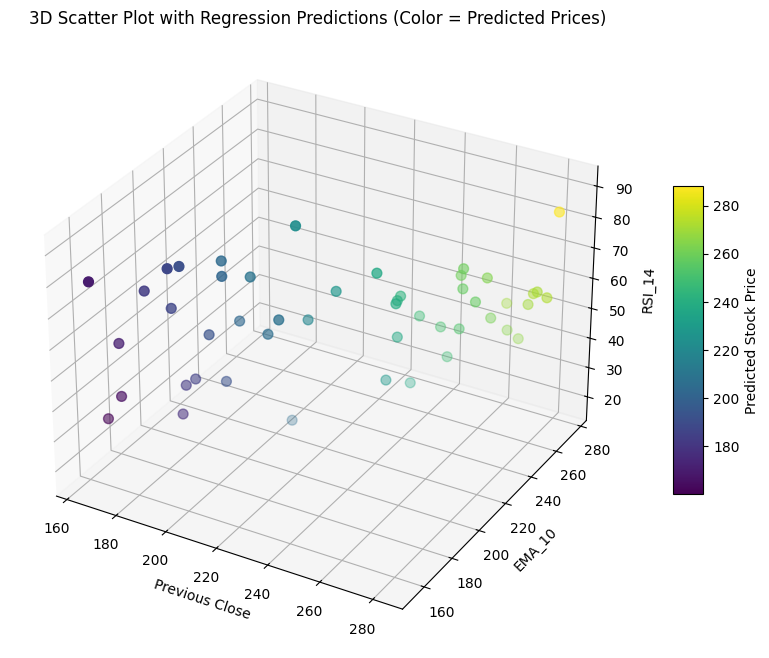

In [10]:
# Scatter graph visualisation
# Step 9: 4D Visualisation with 3D Scatter Plot
# Prepare 3D scatter plot data

x_feature = X_test[:, 0]  # Previous_Close
y_feature = X_test[:, 1]  # EMA_10
z_feature = X_test[:, 2]  # RSI_14
predicted_prices = y_pred  # Color-coded by predicted prices

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x_feature, y_feature, z_feature, c=predicted_prices, cmap='viridis', s=50)
ax.set_title("3D Scatter Plot with Regression Predictions (Color = Predicted Prices)")
ax.set_xlabel("Previous Close")
ax.set_ylabel("EMA_10")
ax.set_zlabel("RSI_14")

# Add color bar for predictions
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Predicted Stock Price")
plt.show()

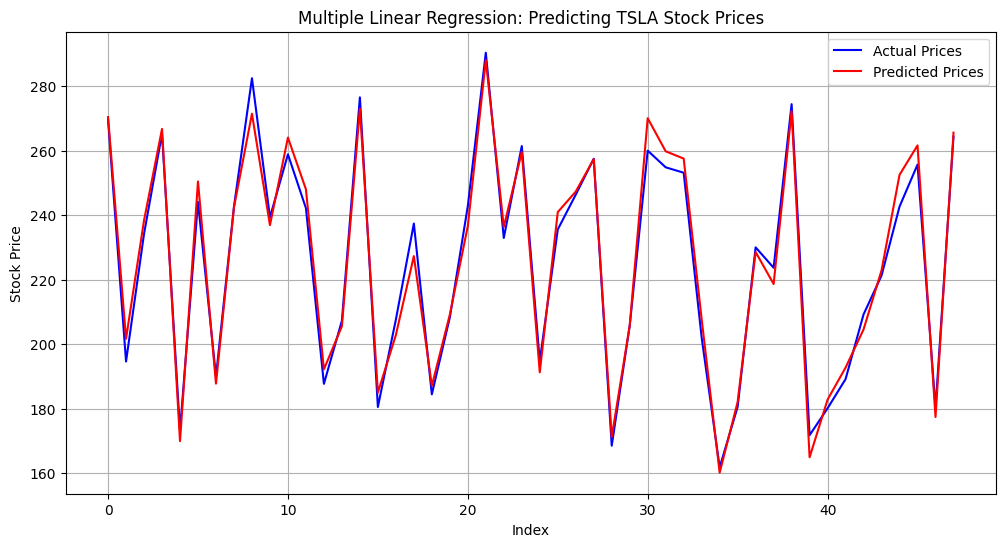

In [11]:
# Line graph visualisation

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Prices')
plt.title("Multiple Linear Regression: Predicting TSLA Stock Prices")
plt.xlabel("Index")  # the row of test data
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()
